
# A Business Storytelling Case Study of HR Workforce Analytics 

This notebook presents a business-focused HR analytics case study designed to surface workforce structure, compensation dynamics, and attrition patterns.

This file intentionally avoids predictive modeling. Modeling is handled separately in the CRISP-DM notebook.

Objective:
Understand workforce health and identify strategic HR risks using descriptive analytics.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


## 1. Business Context


Employee attrition, compensation equity, and career progression directly impact organizational performance.

Leadership seeks to understand:

• Where compensation disparities exist  
• How careers progress internally  
• When attrition occurs  
• Whether workforce structure supports retention  

This analysis answers those questions.


## 2. Data Loading & Preparation

In [2]:

df = pd.read_csv("HumanResources_India.csv")

df["hiredate"] = pd.to_datetime(df["hiredate"])
df["termdate"] = pd.to_datetime(df["termdate"], errors="coerce")
df["birthdate"] = pd.to_datetime(df["birthdate"])

df["age"] = ((pd.Timestamp.today() - df["birthdate"]).dt.days / 365).astype(int)
df["tenure_years"] = ((pd.Timestamp.today() - df["hiredate"]).dt.days / 365).round(1)
df["is_terminated"] = df["termdate"].notna()

df.head()


,employee_id,first_name,last_name,gender,state,city,hiredate,department,job_title,education_level,salary,performance_rating,overtime,birthdate,termdate,age,tenure_years,is_terminated
0,00-95822412,Isaac,Bakshi,Female,Maharashtra,Pune,2016-10-14,Customer Service,Help Desk Technician,High School,334245,Good,No,1981-06-16,2021-07-05,44,9.3,True
1,00-42868828,Anvi,Konda,Male,Kerala,Kochi,2017-03-28,IT,System Administrator,Bachelor,579262,Good,No,1972-02-25,2019-06-14,53,8.9,True
2,00-83197857,Liam,Chaudry,Male,Karnataka,Mangalore,2016-09-19,Operations,Logistics Coordinator,Bachelor,372853,Good,No,1996-03-20,2021-03-06,29,9.4,True
3,00-13999315,Gagan,Sami,Male,Karnataka,Mangalore,2016-01-13,Operations,Inventory Specialist,Bachelor,402906,Good,No,1986-04-05,2018-11-06,39,10.1,True
4,00-90801586,Ayushman,Chander,Male,Uttar Pradesh,Varanasi,2015-03-26,IT,Software Developer,Bachelor,557955,Good,No,1990-12-13,2017-11-29,35,10.9,True


## 3. Workforce Snapshot

In [3]:

total = len(df)
terminated = df["is_terminated"].sum()
attrition = round(terminated/total*100,2)

pd.DataFrame({
    "Metric":["Total Employees","Terminated Employees","Attrition %"],
    "Value":[total,terminated,attrition]
})


,Metric,Value
0,Total Employees,8950.00
1,Terminated Employees,1000.00
2,Attrition %,11.17



This provides baseline organizational context before deeper analysis.


## 4. Hiring and Attrition Over Time

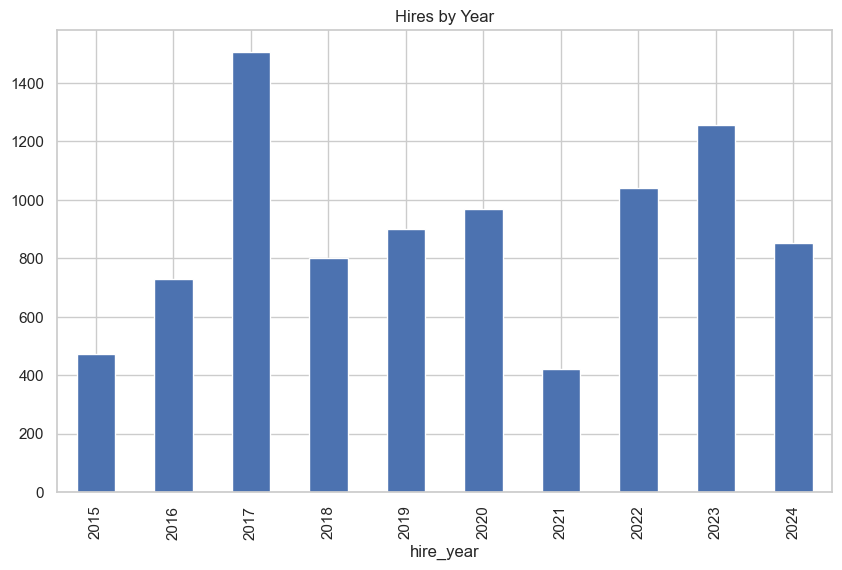

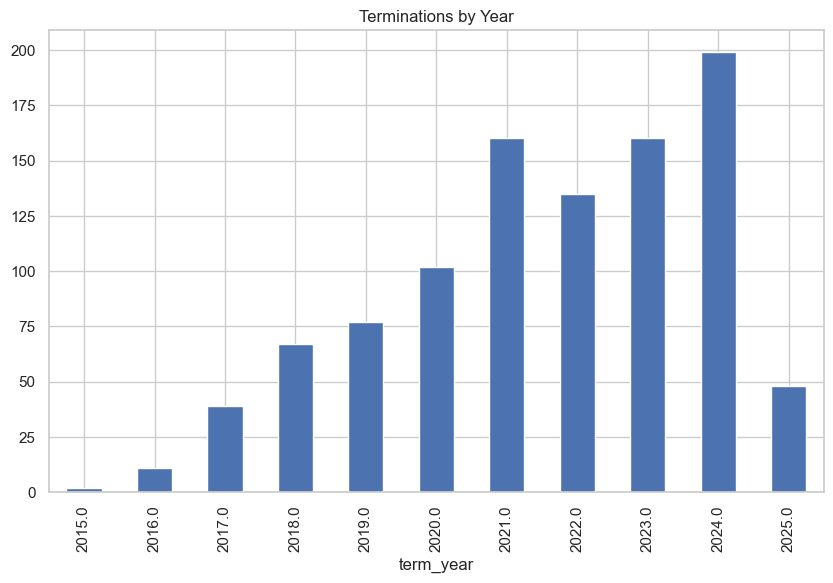

In [4]:

df["hire_year"] = df["hiredate"].dt.year
df["term_year"] = df["termdate"].dt.year

df.groupby("hire_year").size().plot(kind="bar",title="Hires by Year")
plt.show()

df.groupby("term_year").size().plot(kind="bar",title="Terminations by Year")
plt.show()



Hiring and exits fluctuate over time, indicating no single period of workforce instability.


## 5. Compensation Architecture

In [5]:

salary_summary = df.groupby("department")["salary"].agg(
    median="median",
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)

salary_summary


,median,q25,q75
department,,,
Customer Service,343668.0,313612.00,376792.00
Finance,400204.0,345880.00,471270.50
HR,349212.0,310435.00,380745.00
IT,499598.5,371881.75,577315.50
Marketing,357466.0,324457.50,407665.50
Operations,343444.5,313208.75,377217.25
Sales,435581.0,373072.50,514817.00


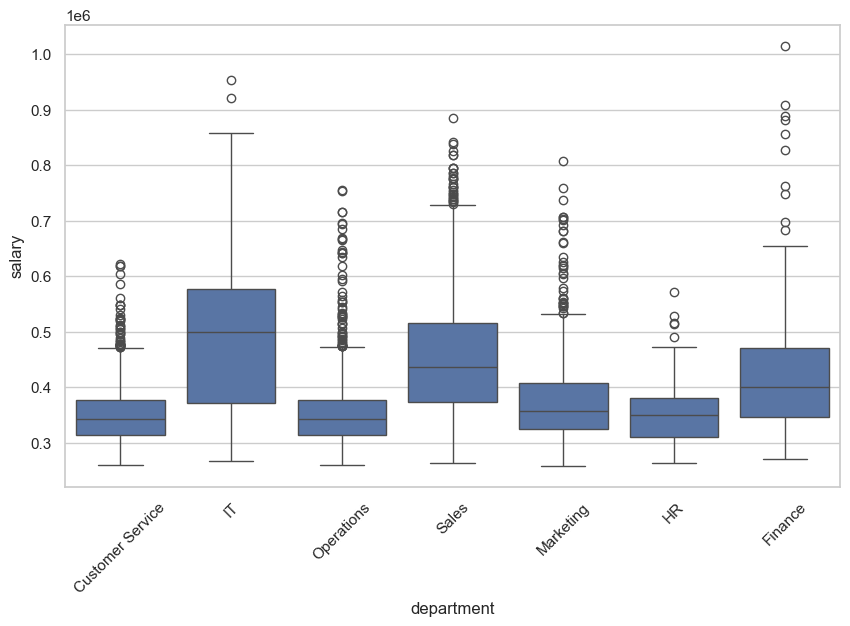

In [6]:

sns.boxplot(data=df, x="department", y="salary")
plt.xticks(rotation=45)
plt.show()



Three compensation tiers emerge:

Tier 1: IT  
Tier 2: Sales & Finance  
Tier 3: HR, Operations, Marketing, Customer Service  

Support functions show salary compression with limited upward dispersion.


## 6. Age vs Salary

In [7]:

from scipy.stats import pearsonr

corr, p = pearsonr(df["age"], df["salary"])
corr, p


(np.float64(0.1481305335029985), np.float64(4.397911791106548e-45))

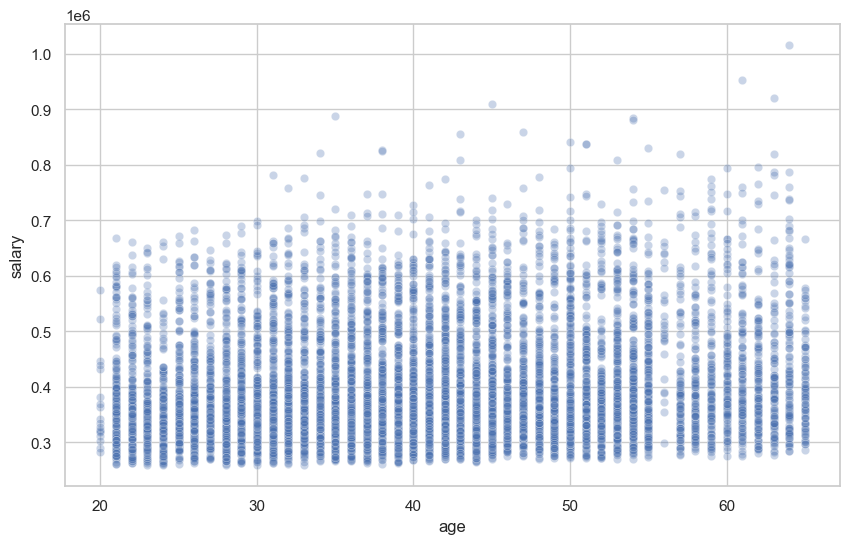

In [8]:

sns.scatterplot(data=df, x="age", y="salary", alpha=0.3)
plt.show()



Age explains only ~2% of salary variance (ρ ≈ 0.15).

Compensation is driven primarily by role and department rather than tenure or age.


## 7. Attrition by Tenure

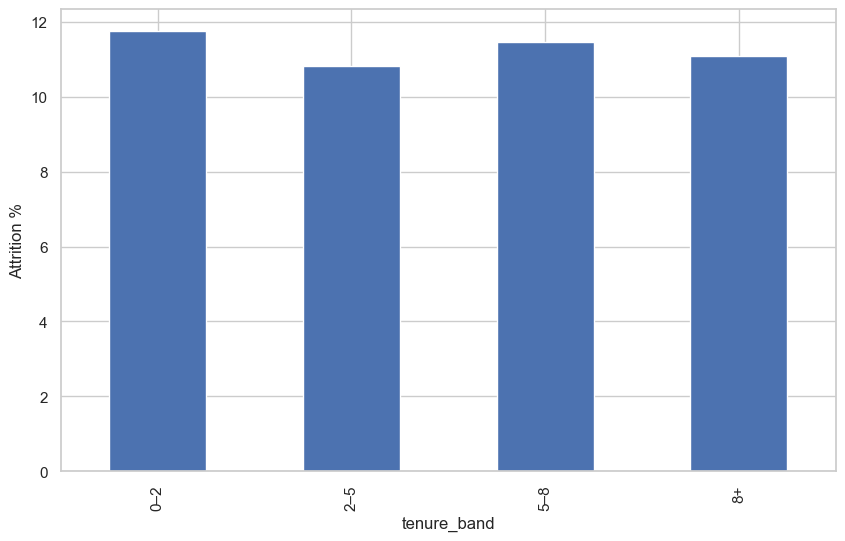

In [9]:

df["tenure_band"] = pd.cut(df["tenure_years"], bins=[0,2,5,8,12], labels=["0–2","2–5","5–8","8+"])

(df.groupby("tenure_band")["is_terminated"].mean()*100).plot(kind="bar")
plt.ylabel("Attrition %")
plt.show()



Attrition occurs across multiple career stages rather than concentrating solely in early tenure.


## 8. Executive Insights


### Key Observations

• Compensation is structured into three clear tiers  
• Support functions experience salary compression  
• Career earnings growth is limited outside technical and revenue roles  
• Attrition occurs at multiple tenure stages  
• Salary progression is weakly correlated with age  

These patterns suggest limited internal mobility and potential retention risk among lower-tier roles.


## 9. Strategic Recommendations


1. Introduce formal salary bands using median + IQR benchmarks  
2. Develop transparent career progression frameworks  
3. Perform equity audits across departments  
4. Expand internal mobility pathways  
5. Invest in engagement and performance telemetry before predictive retention efforts


## 10. Limitations


• Dataset is synthetically generated  
• No behavioral or longitudinal performance data  
• No causal inference possible  

Insights are directional and intended for analytical demonstration.



# Executive Summary

This analysis reveals structural compensation tiers and limited income mobility for support functions.

Salary progression is driven primarily by department rather than experience. Attrition occurs throughout employee lifecycles, indicating systemic rather than onboarding-related retention challenges.

Predictive retention modeling (covered separately) confirms that static HR attributes are insufficient for churn prediction.

The primary organizational opportunity lies in strengthening career pathways, addressing salary compression, and investing in workforce behavioral data.

Effective retention begins with workforce design and not algorithms.
